In [320]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [321]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                 header = None)

In [322]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [323]:
df = df.rename(columns={0: 'age',
                        1: 'workclass',
                        2: 'final weight',
                        3: 'education',
                        4: 'education num',
                        5: 'marital status',
                        6: 'occupation',
                        7: 'relationship',
                        8: 'race',
                        9: 'sex',
                        10: 'capital gain',
                        11: 'capital loss',
                        12: 'hours per week',
                        13: 'native country',
                        14: 'income'})

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education num   32561 non-null  int64 
 5   marital status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital gain    32561 non-null  int64 
 11  capital loss    32561 non-null  int64 
 12  hours per week  32561 non-null  int64 
 13  native country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [325]:
# Lets check unique values and their counts of non-numerical variables

for col in df.columns:
    if df[col].dtypes == 'object':
        print(f'{col} \n\n{df[col].value_counts()} \n')

workclass 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

education 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

marital status 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital status, dtype: int64 

occupation 

 Prof-spec

**Note**: Number of records with unknown(' ?') work class is almost the same as with unknown occupation, which is pretty logical. 
Lets remove all the records with unknown work class and then check number of records with unknown occupation left.

In [326]:
df = df.loc[df['workclass'] != ' ?']
df.loc[df['occupation']==' ?']

,age,workclass,final weight,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


**Note**: As it was expected, all the records, that had blank 'workclass' had also no value in 'occupation'. All 7 values of ' Never-worked' class also have ' ?' values of ocupation can be changed to 'No'. We are going to need this rows in order to predict later, that all not working people have income of less than 50k per year.

**Note**: Also there is missing data in 'native country' column. There are only 556 rows, they will be removed

In [327]:
df = df.loc[df['native country'] != ' ?']

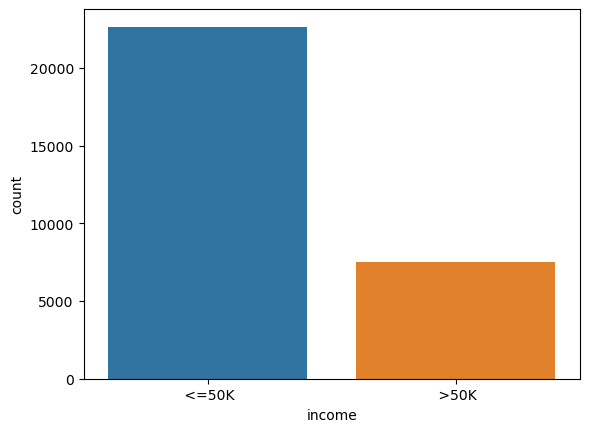

 <=50K    22661
 >50K      7508
Name: income, dtype: int64


In [329]:
# Let's check the distribution of the target variable

sns.countplot(x = df['income'])
plt.show()
print(df['income'].value_counts())

<Axes: xlabel='count', ylabel='sex'>

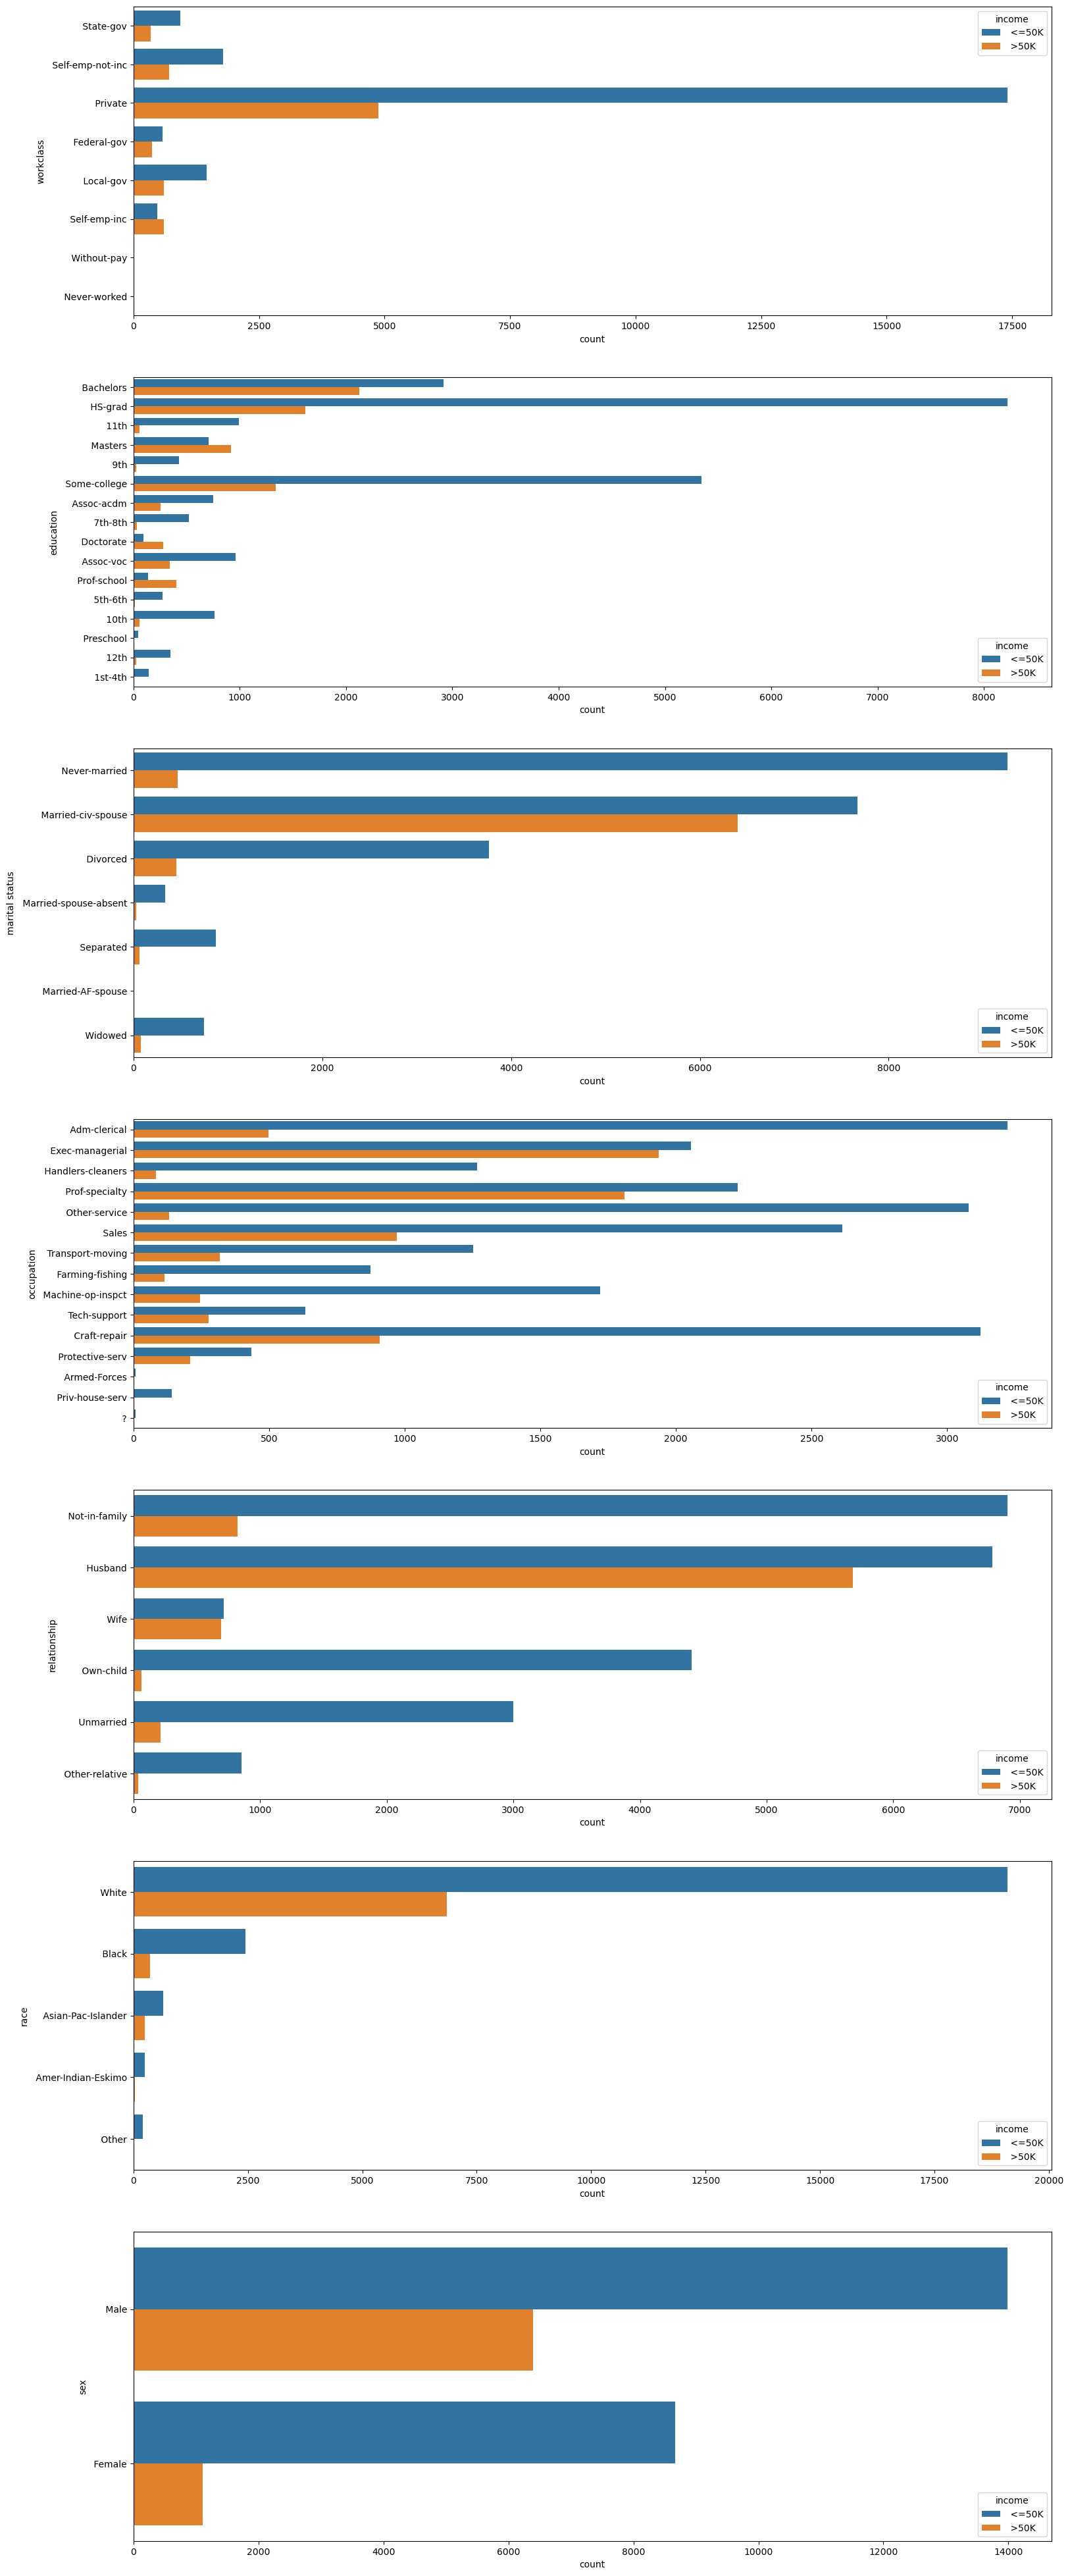

In [328]:
# Let's plot our categorical variables, hued by level of income

fig, axes = plt.subplots(7, 1,figsize=(18, 50))
sns.countplot(ax = axes[0], data=df, y="workclass", hue="income")
sns.countplot(ax = axes[1], data=df, y="education", hue="income")
sns.countplot(ax = axes[2], data=df, y="marital status", hue="income")
sns.countplot(ax = axes[3], data=df, y="occupation", hue="income")
sns.countplot(ax = axes[4], data=df, y="relationship", hue="income")
sns.countplot(ax = axes[5], data=df, y="race", hue="income")
sns.countplot(ax = axes[6], data=df, y="sex", hue="income")

In [330]:
# Let's divide our dataset by level of income into 2 sets.

over50k = df[df['income']==" >50K"]
under50k = df[df['income']==" <=50K"]

Text(0.5, 0, 'age')

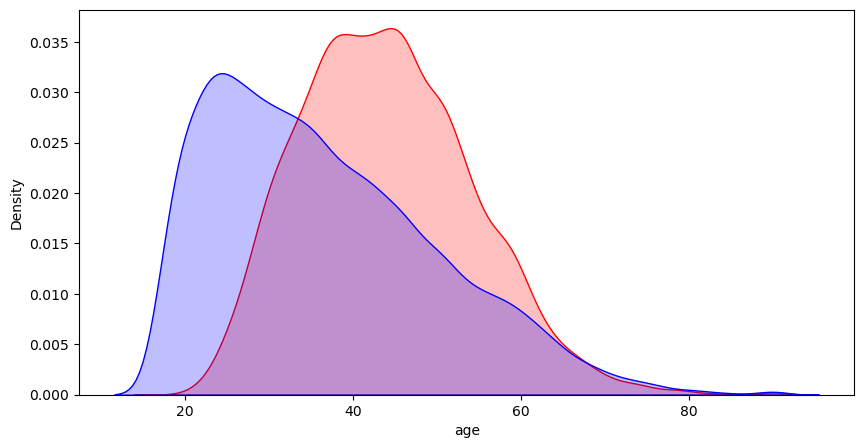

In [331]:
# Now we can plot numerical variables from 2 datasets above and compare them

plt.figure(figsize=[10,5])

sns.kdeplot(over50k['age'], fill = True, color = 'red')
sns.kdeplot(under50k['age'], fill = True, color = 'blue')

plt.xlabel('age')

Text(0.5, 0, 'education')

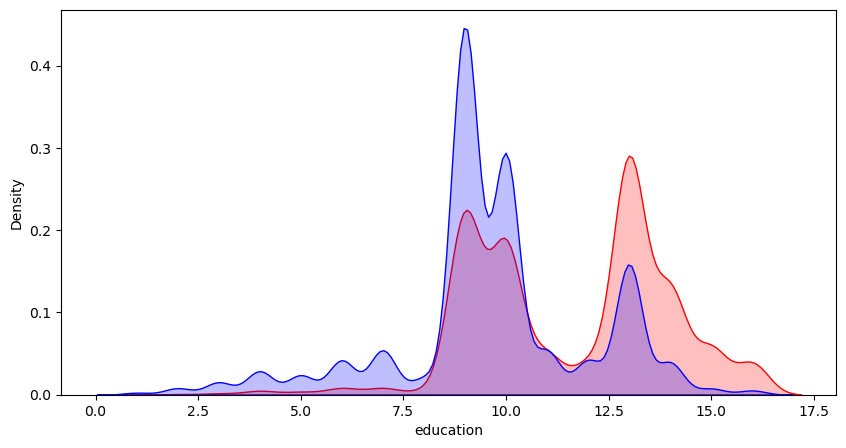

In [332]:
plt.figure(figsize=[10,5])

sns.kdeplot(over50k['education num'], fill = True, color = 'red')
sns.kdeplot(under50k['education num'], fill = True, color = 'blue')

plt.xlabel('education')

**Note**: If we look at this variable closer, we'll be able to see, that it's just ranked numbers for variable 'education', so their correlation coefficient would be 1. I'll skip this variable , as it has no information by itself

In [333]:
df.drop(['education num'], axis = 1, inplace = True)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30169 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30169 non-null  int64 
 1   workclass       30169 non-null  object
 2   final weight    30169 non-null  int64 
 3   education       30169 non-null  object
 4   marital status  30169 non-null  object
 5   occupation      30169 non-null  object
 6   relationship    30169 non-null  object
 7   race            30169 non-null  object
 8   sex             30169 non-null  object
 9   capital gain    30169 non-null  int64 
 10  capital loss    30169 non-null  int64 
 11  hours per week  30169 non-null  int64 
 12  native country  30169 non-null  object
 13  income          30169 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


Text(0.5, 0, 'working hours per week')

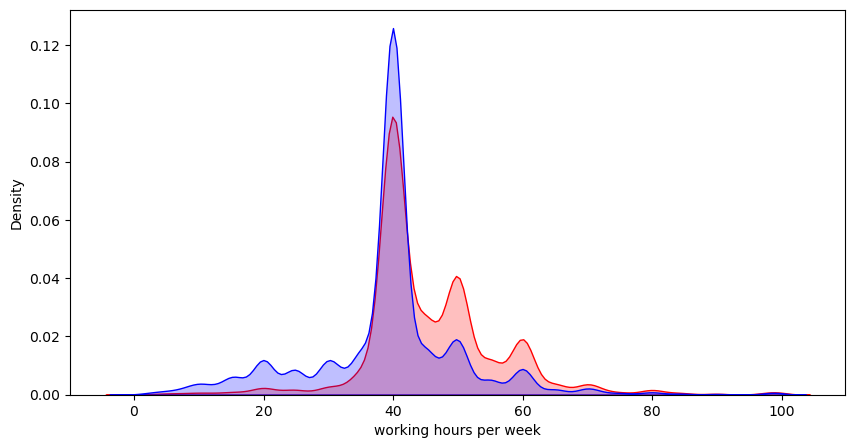

In [335]:
plt.figure(figsize=[10,5])

sns.kdeplot(over50k['hours per week'], fill = True, color = 'red')
sns.kdeplot(under50k['hours per week'], fill = True, color = 'blue')

plt.xlabel('working hours per week')

Text(0.5, 0, 'final weight')

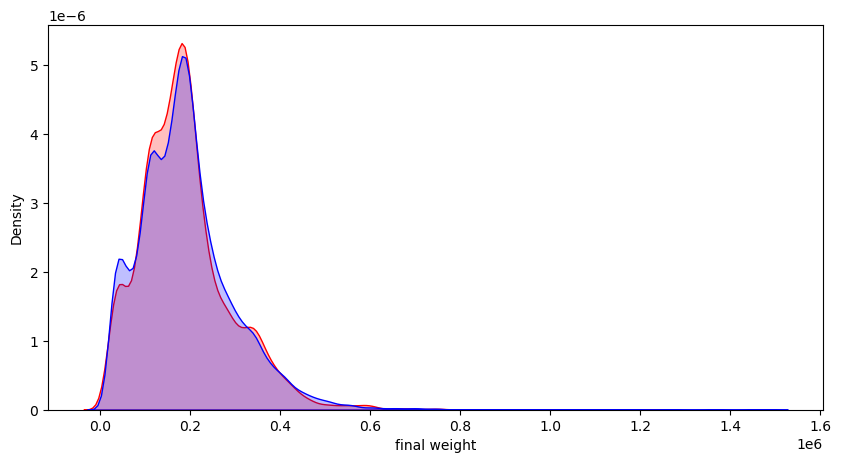

In [336]:
plt.figure(figsize=[10,5])

sns.kdeplot(over50k['final weight'], fill = True, color = 'red')
sns.kdeplot(under50k['final weight'], fill = True, color = 'blue')

plt.xlabel('final weight')

<Axes: >

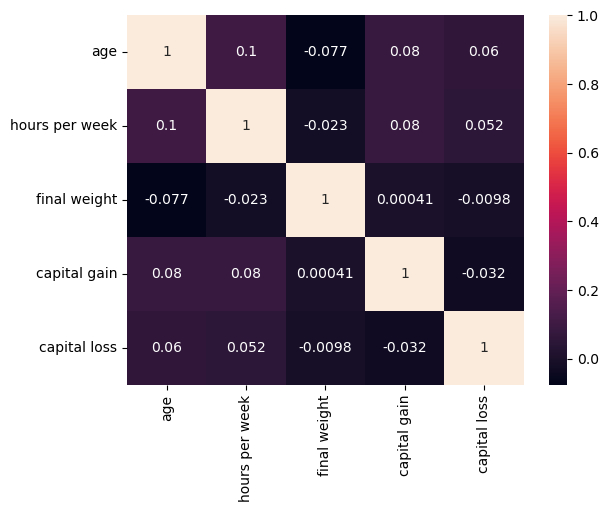

In [337]:
# Let's see the correlations between numerical variables

df_num = df.filter(['age', 'hours per week', 'final weight', 'capital gain', 'capital loss'], axis=1)

corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot = True)

According to plots some draft **conclusions** can be made:
- dataset is strongly imbalanced
- there is no strong positive or negative correlation between numerical variables
- income does not depend much on final weight (which is synthetic variale), but
- income does depend on the rest of cateforical and numeric variables. For example, ratio of women earning >50k to women earning >= 50k is much lower than the same ratio for men
- it is also pretty interesting, that families without kids earn more. Look at ratio of 'husband' and 'wife' classes compared to 'one child' or 'unmarried'. Those, who only have a spouse, are divided almost 50/50 by level of income, while there are very few percents of people having a child or being unmarried and earning >50k